# Problem Set 3



Team: 
    Lea Schmierer 3546563;
    Angelina Basova 3704658;
    Daniel Knorr 3727033

## Exercise 1


## Exercise 2

## Exercise 3

## Exercise 4

In [43]:
#a)
try:
    import numpy
except:
    print ("This implementation requires the numpy module.")
    exit(0)


"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T


if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 3

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)

    print('P:')
    print(nP)

    print('Q:')
    print(nQ)

    print("No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.")

    print('R:')
    print(nR)


P:
[[2.64841488 0.63158452 0.68212228]
 [1.00466722 0.07338254 2.47505975]
 [0.34331331 2.29394337 1.20327682]
 [2.12818624 0.15067243 1.29323964]
 [1.61927466 0.72926016 0.60233634]
 [1.20941502 1.4373117  0.29044724]]
Q:
[[ 0.04320736  0.43257042  0.86383913]
 [ 0.37390977  1.25795237  0.79921753]
 [ 0.69570495  1.23123616  1.67950452]
 [ 1.60811806 -0.30708281  0.96357548]
 [ 1.99526772  0.28376885  0.59405683]
 [ 1.32210119 -0.2643637   1.566937  ]
 [ 0.68765735  0.49882508  1.32225198]
 [ 1.37319512  0.06290706  0.81300416]
 [ 1.33887163  0.78339634  1.42661424]
 [ 0.28936995  0.91499053  0.65985598]
 [ 0.82343042  2.01071312  0.01382244]
 [ 2.34053331  1.15989326  0.24614574]]
No I don't obtain the same matrices Q and P as shown in the lecture, because I don't have fix numbers. The optimization starts on random numbers.
R:
[[0.97687971 2.32993554 3.76577249 4.72229135 5.86874013 4.40334708
  3.03818969 4.23108976 5.01379391 1.79436799 3.46014925 7.09917537]
 [2.2132056  2.4460777

Error:
3.365493640190576
3.359481619586653
3.353432866542696
3.3473473226907573
3.3412249349605707
3.335065655659933
3.3288694425550496
3.322636258950787
3.3163660737707903
3.310058861637415
3.303714602951421
3.29733328397138
3.290914896892739
3.284459439926497
3.277966917377426
3.271437339721798
3.2648707236845476
3.2582670923158235
3.2516264750668666
3.244948907865159
3.2382344331887842
3.2314831001399353
3.2246949645175205
3.2178700888887923
3.2110085426599513
3.204110402145651
3.1971757506373493
3.190204678470442
3.183197283090109
3.1761536691158154
3.169073948404402
3.1619582401116992
3.154806670752595
3.1476193742595013
3.1403964920391463
3.133138173027625
3.1258445737436507
3.118515858339937
3.111152198652637
3.103753774248791
3.096320772471702
3.088853388484181
3.0813518253095955
3.0738162938706566
3.0662470130258823
3.0586442096036666
3.051008118433902
3.043338982377084
3.0356370523508396
3.0279025873538146
3.0201358544868686
3.0123371289715073
3.0045066941655003
2.99664484157

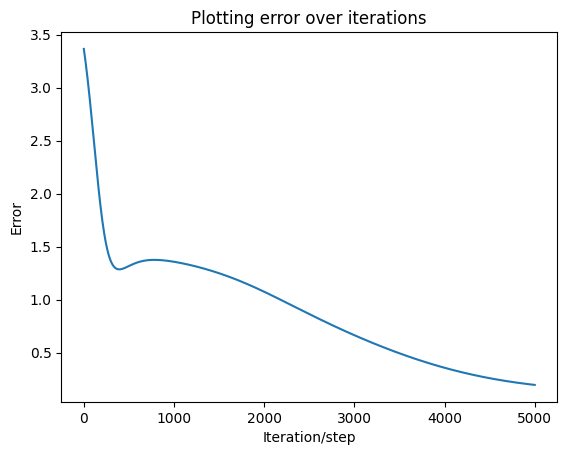

In [45]:
#b)
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    print('Error:')
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        print(eij)
        error.append(eij)  

        if e < 0.001:
            break

    plt.plot(error)
    plt.ylabel('Error')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


Differences:


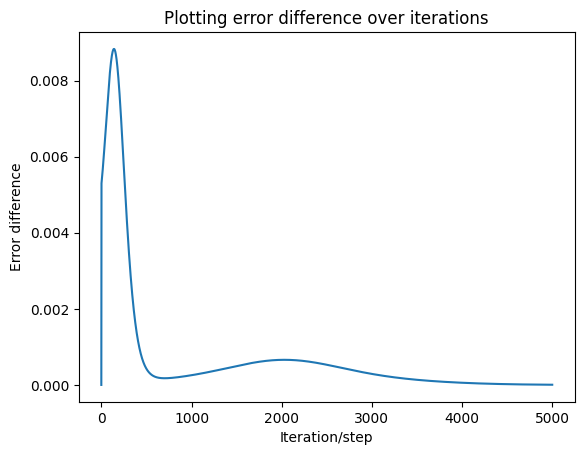

In [48]:
#b)
import numpy
import matplotlib.pyplot as plt

def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error=[]
    differences=[]
    print('Differences:')
    for step in range(steps):
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = numpy.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
                
        if len(error) == 0:
            errordiff = 0
        else:
            errordiff = error.pop()-eij

        differences.append(errordiff)
        error.append(eij)  

        if e < 0.001:
            break

    plt.plot(differences)
    plt.ylabel('Error difference')
    plt.xlabel('Iteration/step')
    plt.title('Plotting error difference over iterations')
    plt.show()
    return P, Q.T




if __name__ == "__main__":
    R = [
        [1,0,3,0,0,5,0,0,5,0,4,0],
        [0,0,5,4,0,0,4,0,0,2,1,3],
        [2,4,0,1,2,0,3,0,4,3,5,0],
        [0,2,4,0,5,0,0,4,0,0,2,0],
        [0,0,4,3,4,2,0,0,0,0,2,5],
        [1,0,3,0,3,0,0,2,0,0,4,0]
        ]

    R = numpy.array(R)

    N = len(R)
    M = len(R[0])
    K = 2

    P = numpy.random.rand(N,K)
    Q = numpy.random.rand(M,K)

    nP, nQ = matrix_factorization(R, P, Q, K)
    nR= numpy.dot(nP, nQ.T)


## Exercise 5

## Exercise 6 Bonus